In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import train_test_split
from imblearn.under_sampling import NearMiss

import sys
sys.path.append('../')

from utils.model_utils import *

## 1. Redimensionando e Selecionando os atributos

In [2]:
df = pd.read_csv("../data\creditcardClean.csv")

In [3]:
df

,Unnamed: 0,Time,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
281913,284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
281914,284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
281915,284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
281916,284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [4]:
# Separando os dados entre X(Variaveis que serão usadas para fazer a previsão) e y(a classe a ser prevista).
X = df.drop(['Class', 'Unnamed: 0'], axis=1)
y = df['Class']

In [5]:
X.shape

(281918, 30)

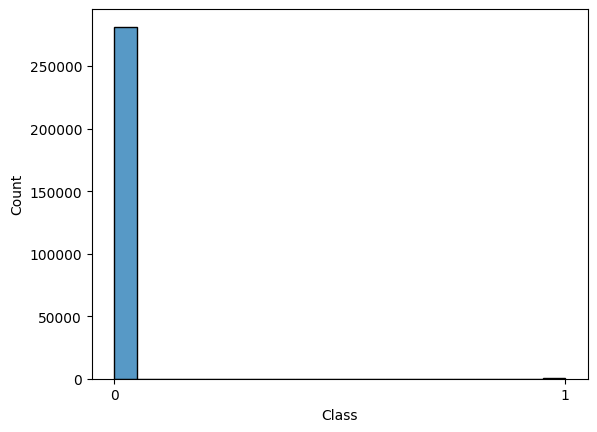

In [6]:
sns.histplot(x=y)
plt.locator_params(axis='x', nbins=2)

In [7]:
nm = NearMiss(version=1)
X, y = nm.fit_resample(X, y)

c:\Users\miche\OneDrive\Área de Trabalho\Credit-card\venv\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] O sistema não pode encontrar o arquivo especificado
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\miche\OneDrive\Área de Trabalho\Credit-card\venv\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "C:\Users\miche\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 503, in run
    with Popen(*popenargs, **kwargs) as process:
  File "C:\Users\miche\AppData\Local\Programs\Python\Python310\lib\subprocess.py", line 971, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\miche\AppData\Local\Programs\Python\Py

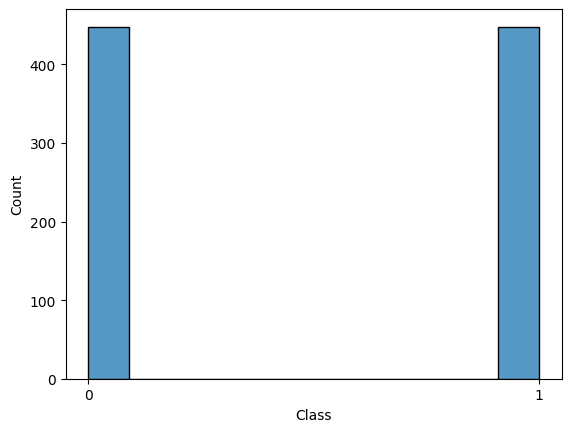

In [8]:
sns.histplot(x=y)
plt.locator_params(axis='x', nbins=2)

In [9]:
# Selecionando os atributos de acordo com a variancia
selection = VarianceThreshold(threshold=0.400)
X_selection = selection.fit_transform(X)

In [10]:
selection.variances_

array([2.20858789e+09, 2.85419019e+01, 1.11386027e+01, 3.72242672e+01,
       9.85649739e+00, 1.70776493e+01, 2.57226524e+00, 2.99172971e+01,
       1.56044573e+01, 5.18197058e+00, 1.95960196e+01, 7.32568895e+00,
       2.07457149e+01, 1.08813456e+00, 2.08531546e+01, 9.34691386e-01,
       1.19997893e+01, 3.56844670e+01, 5.69856383e+00, 1.56998522e+00,
       9.41458699e-01, 3.66558668e+00, 8.86618315e-01, 1.27977857e+00,
       3.20610609e-01, 4.50607463e-01, 1.83036184e-01, 8.76300164e-01,
       1.83258650e-01, 3.89458061e+04])

In [11]:
X_selection.shape

(896, 27)

In [12]:
X_selection = pd.DataFrame(X_selection, columns=X.iloc[:, 0:27].columns)

In [13]:
# Divindo entre treino e teste, evitando o overfitting.
X_train, X_test, y_train, y_test = train_test_split(X_selection, y, test_size=0.25,  random_state=3)

In [14]:
X_train.shape, X_test.shape

((672, 27), (224, 27))

In [15]:
y_train.shape, y_test.shape

((672,), (224,))

In [16]:
y_train.value_counts(), y_test.value_counts()

(Class
 1    341
 0    331
 Name: count, dtype: int64,
 Class
 0    117
 1    107
 Name: count, dtype: int64)

In [17]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26
190,76835.0,-1.264334,1.766895,0.596848,0.554130,0.255516,-0.088519,0.388093,0.070170,-0.535381,...,-0.544254,0.238392,0.833171,-0.077911,0.156062,0.120421,-0.182646,-0.104788,-0.789396,5.00
862,154657.0,-0.679521,4.672553,-6.814798,7.143500,0.928654,-1.873013,-2.306689,0.993702,-4.944054,...,-2.128027,0.706765,1.093826,0.872006,0.566849,-0.321691,-0.281325,-0.073394,0.760542,0.77
237,77161.0,-0.386156,1.473872,0.064711,1.040180,0.061092,-1.015279,0.638019,0.173244,-0.808360,...,0.432205,-0.829239,-0.182243,-0.067728,0.266357,0.889129,0.181408,-0.805148,0.205023,3.99
522,28625.0,-27.848181,15.598193,-28.923756,6.418442,-20.346228,-4.828202,-19.210896,18.329406,-3.668735,...,-11.588544,-4.715420,0.734573,1.697856,1.802149,-2.062934,-1.269843,1.999499,1.324809,99.99
3,76866.0,1.245537,0.419648,0.312943,1.111459,-0.205612,-0.950912,0.267398,-0.274685,-0.127708,...,-0.467398,-0.241561,-0.375801,-0.098066,0.035687,0.186705,-0.107300,0.712330,0.018576,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
256,77164.0,1.467115,-1.056831,0.323883,-1.282609,-1.544734,-0.888672,-0.957269,-0.096476,-1.730224,...,1.037979,-0.402338,-0.713410,-0.481294,-0.118471,0.018579,0.056035,0.348943,0.026177,12.90
643,59669.0,0.326007,1.286638,-2.007181,2.419675,-1.532902,-1.432803,-2.459530,0.617738,-1.125861,...,-5.071450,-0.749172,0.228423,0.222667,0.556895,0.169776,-0.174357,0.710996,0.580495,6.27
249,17192.0,1.316272,-0.128906,0.116880,-0.623182,-0.252613,-0.459495,-0.157528,-0.255942,2.884134,...,0.649108,0.206882,1.029569,-0.090935,-0.235855,-0.049573,-0.277175,0.977714,0.042793,12.95
664,67571.0,-0.758469,-0.045410,-0.168438,-1.313275,-1.901763,0.739433,3.071892,-0.483422,0.618203,...,0.243347,-0.342301,0.687056,-0.032500,0.042619,0.397224,0.072229,0.560916,0.150606,549.06


In [18]:
X_train = preprocessor(X=X_train)
X_test = preprocessor(X=X_test)

In [19]:
X_train

array([[4.49522004e-01, 8.91488331e-01, 3.81415291e-01, ...,
        6.69090283e-01, 4.99672877e-01, 2.34728533e-03],
       [9.07632626e-01, 9.09289264e-01, 5.01670600e-01, ...,
        6.73581687e-01, 7.01527584e-01, 3.57502376e-04],
       [4.51441051e-01, 9.18218873e-01, 3.69288061e-01, ...,
        5.68893074e-01, 6.29180098e-01, 1.87218349e-03],
       ...,
       [9.84247333e-02, 9.70038485e-01, 3.02954506e-01, ...,
        8.23958816e-01, 6.08052199e-01, 6.08694834e-03],
       [3.94988109e-01, 9.06886192e-01, 3.06410106e-01, ...,
        7.64329560e-01, 6.22093225e-01, 2.58271946e-01],
       [9.23096847e-01, 9.22599339e-01, 4.79927433e-01, ...,
        6.78992877e-01, 6.55803007e-01, 3.57502376e-04]])

## 2. Avaliando modelos e hiperparamteros

In [20]:
validation_clf_models(X_train, X_test, y_train, y_test)

SVC(probability=True)
 
F1 Score train: 0.948
Accuracy train: 0.949
Recall train: 0.900
Precision train: 1.000
Log loss train: 1.824
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.946
Accuracy test: 0.951
Recall test: 0.897
Precision test: 1.000
Log loss test: 1.770
--------------------------------------------------
LogisticRegression()
 
F1 Score train: 0.933
Accuracy train: 0.936
Recall train: 0.874
Precision train: 1.000
Log loss train: 2.306
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.908
Accuracy test: 0.920
Recall test: 0.832
Precision test: 1.000
Log loss test: 2.896
--------------------------------------------------
RandomForestClassifier()
 
F1 Score train: 1.000
Accuracy train: 1.000
Recall train: 1.000
Precision train: 1.000
Log loss train: 0.000
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
F1 Score test: 0.856
Accuracy test: 0.848
Recall test: 0.944
Precision test: 0.783
Log loss test: 5.471
--

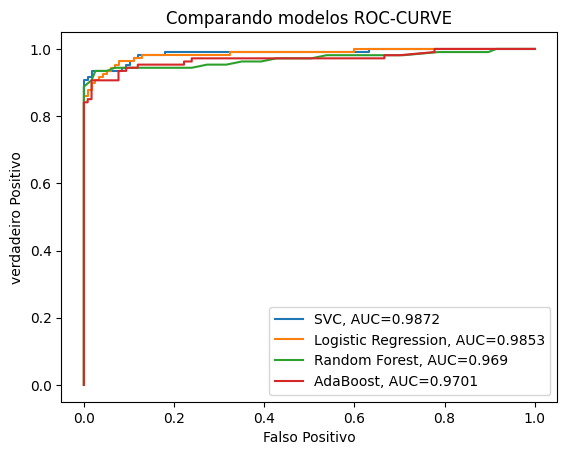

In [21]:
plot_validation_clf_models(X_train, X_test, y_train, y_test)

In [22]:
#param_model_select(X_train, y_train)

In [23]:
#best_params_models( X_train, y_train)

## 3. Criação do modelo

In [24]:
clf = AdaBoostClassifier(algorithm="SAMME", learning_rate=1.0, n_estimators=100)

In [25]:
clf.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [26]:
predict = clf.predict(X_test)

In [27]:
predict

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1], dtype=int64)

--------------------------------------------------
              precision    recall  f1-score   support

           0       0.90      0.99      0.94       117
           1       0.99      0.88      0.93       107

    accuracy                           0.94       224
   macro avg       0.94      0.93      0.94       224
weighted avg       0.94      0.94      0.94       224

--------------------------------------------------
F1 Score test: 0.931


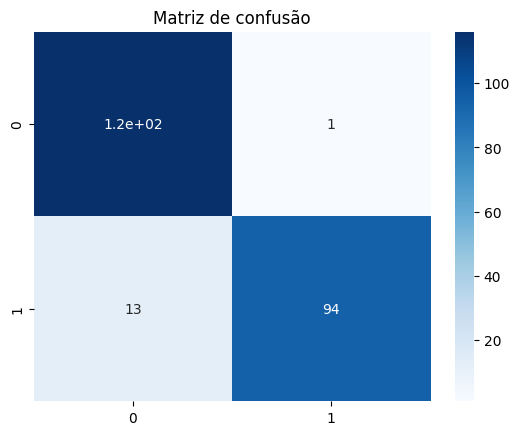

In [28]:
evaluate(y_test, predict)

## 4. Exportação do modelo

In [29]:
fraud_detection_clf = AdaBoostClassifier(algorithm="SAMME", learning_rate=1.0, n_estimators=100)

In [30]:
fraud_detection_clf.fit(X_selection, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [31]:
with open('model/fraud_detection_clf.sav', 'wb') as m:
    pickle.dump(fraud_detection_clf, m)

Model to test in web

In [32]:
X_mini = pd.DataFrame(X_selection, columns=X.iloc[:, 0:4].columns)

In [33]:
X_mini = preprocessor(X=X_mini)

In [34]:
mini_fraud_detection_clf = AdaBoostClassifier(algorithm="SAMME", learning_rate=1.0, n_estimators=100)

In [35]:
mini_fraud_detection_clf.fit(X_mini, y)

AdaBoostClassifier(algorithm='SAMME', n_estimators=100)

In [36]:
with open('model/mini_fraud_detection_clf.sav', 'wb') as m:
    pickle.dump(mini_fraud_detection_clf, m)

In [37]:
type(predict)

numpy.ndarray